# Data Mining II Project 
***
#### University of Pisa -  Federica Trevisan

# Outlier detection 
From the Abalone dataset, identify the top 1% outliers. 

## Dataset
The UCI Abalone dataset, containing various features of abalones, including the age – to be inferred by the number or rings. 
https://archive.ics.uci.edu/ml/datasets/Abalone

## Objective
Adopt at least two different methods belonging to different families (i.e. model-based, distance-based, density-based, angle-based, …) to identify the 1% of input records with the highest likelihood of being outliers, and compare the results.

## DBSCAN

In [1]:
import numpy as np
%pylab inline
import pandas as pd

abalone_data = pd.read_csv("abalone_dataset.csv")
abalone_data = abalone_data.drop('sex', axis = 1)
abalone_data.describe()

Populating the interactive namespace from numpy and matplotlib


,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [2]:
abalone_data.head()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
dataset = abalone_data.values

## Apply DBSCAN
Fix min_pts=5 and try several eps between 0 and 1

Plot noise size vs. epsilon

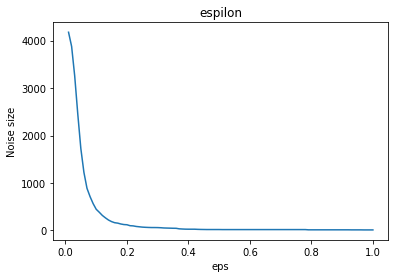

In [4]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

xx = np.linspace(0.01, 1.00, 100)
yy = list()
for eps in xx:
    dbscan = DBSCAN(eps, min_samples=5, metric='euclidean')
    dbscan.fit(dataset)
    labels = dbscan.labels_
    # yy = size of noise cluster
    # yy.append(float(len([1 for i in labels if i == -1])) / len(dataset))
    hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
    clusters = dict(zip(bins, hist))
    yy.append(clusters.get(-1))
    
plt.xlabel('eps')
plt.ylabel('Noise size')
plt.title('espilon')
plot(xx, yy)
plt.draw()
plt.savefig("epsilon.png",dpi=100)
plt.show()

eps in order to have 1% outliers

In [5]:
my_eps = min( [ xx[i] for i in range(len(xx)) if yy[i]<50 ] )
print(my_eps)

0.33


In [6]:
dbscan = DBSCAN(my_eps, min_samples=5, metric='euclidean')
dbscan.fit(dataset)
labels = dbscan.labels_
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))

('labels', {0: 103, 1: 391, 2: 687, 3: 634, 4: 567, 5: 23, 6: 67, 7: 32, 8: 122, 9: 486, 10: 266, 11: 40, 12: 202, 13: 113, 14: 57, 15: 258, 16: 12, 17: 53, 18: 15, 19: 0, -1: 49})


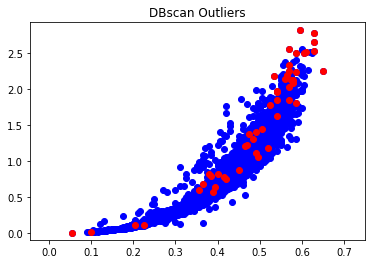

In [7]:
dbscan = DBSCAN(my_eps, min_samples=5, metric='euclidean')
dbscan.fit(dataset)
labels = dbscan.labels_
noise = array([ dataset[i] for i in range(len(dataset)) if labels[i]==-1])

xlim(min(dataset[:,1]-0.1), max(dataset[:,1])+0.1)
ylim(min(dataset[:,3]-0.1), max(dataset[:,3])+0.1)

plot(dataset[:,1], dataset[:,3], 'bo')
plot(noise[:,1], noise[:,3], 'ro')


plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan1.png",dpi=100)
plt.show()

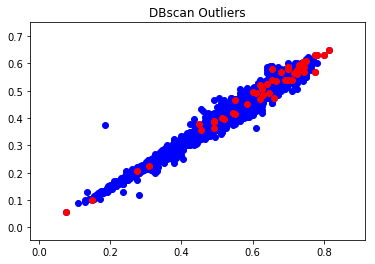

In [8]:
xlim(min(dataset[:,0]-0.1), max(dataset[:,0])+0.1)
ylim(min(dataset[:,1]-0.1), max(dataset[:,1])+0.1)

plot(dataset[:,0], dataset[:,1], 'bo')
plot(noise[:,0], noise[:,1], 'ro')

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan2.png",dpi=100)
plt.show()

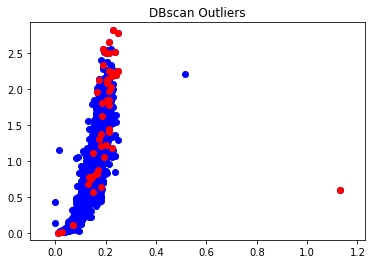

In [9]:
xlim(min(dataset[:,2]-0.1), max(dataset[:,2])+0.1)
ylim(min(dataset[:,3]-0.1), max(dataset[:,3])+0.1)

plot(dataset[:,2], dataset[:,3], 'bo')
plot(noise[:,2], noise[:,3], 'ro')

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan3.png",dpi=100)
plt.show()

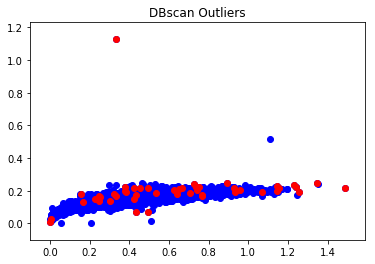

In [10]:
xlim(min(dataset[:,4]-0.1), max(dataset[:,4])+0.1)
ylim(min(dataset[:,2]-0.1), max(dataset[:,2])+0.1)

plot(dataset[:,4], dataset[:,2], 'bo')
plot(noise[:,4], noise[:,2], 'ro')

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan4.png",dpi=100)
plt.show()

In [11]:
abalone_data = pd.read_csv("abalone_dataset.csv")
abalone_data = abalone_data.drop('sex', axis = 1)
abalone_data['dbscan_label'] = dbscan.labels_
abalone_data.head()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,dbscan_label
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [12]:
outliers_dbscan = abalone_data[abalone_data['dbscan_label'] == -1]

In [13]:
outliers_dbscan

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,dbscan_label
129,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18,-1
163,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.0050,18,-1
165,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14,-1
166,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.8500,20,-1
167,0.680,0.570,0.205,1.8420,0.6250,0.4080,0.6500,20,-1
232,0.625,0.505,0.215,1.4455,0.4960,0.2870,0.4350,22,-1
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-1
270,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.5500,22,-1
275,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.5850,22,-1
294,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26,-1


In [14]:
outliers_dbscan.to_csv("outliers_dbscan.csv", sep = ",")

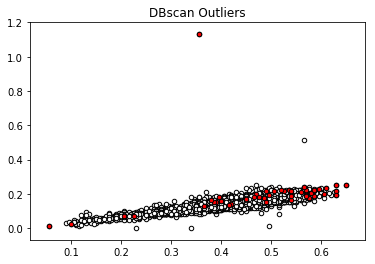

In [15]:
X = abalone_data.values
y_pred = dbscan.labels_
y_outliers = X[y_pred==-1]
a = plt.scatter(X[:, 1], X[:, 2], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 1], y_outliers[:, 2], c='red', edgecolor='k', s=20)


plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan5.png",dpi=100)
plt.show()

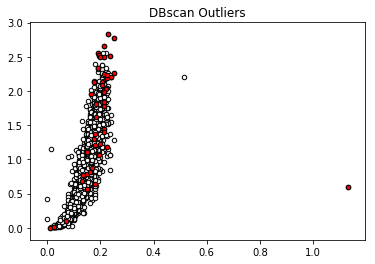

In [16]:
a = plt.scatter(X[:, 2], X[:, 3], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 2], y_outliers[:, 3], c='red', edgecolor='k', s=20)

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan6.png",dpi=100)
plt.show()

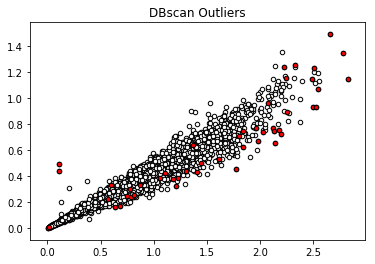

In [17]:
a = plt.scatter(X[:, 3], X[:, 4], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 3], y_outliers[:, 4], c='red', edgecolor='k', s=20)

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan7.png",dpi=100)
plt.show()

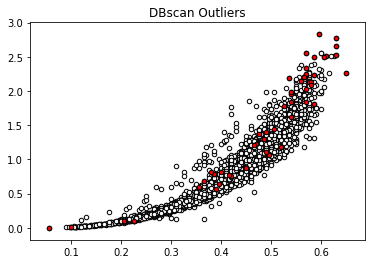

In [18]:
a = plt.scatter(X[:, 1], X[:, 3], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 1], y_outliers[:, 3], c='red', edgecolor='k', s=20)

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan8.png",dpi=100)
plt.show()

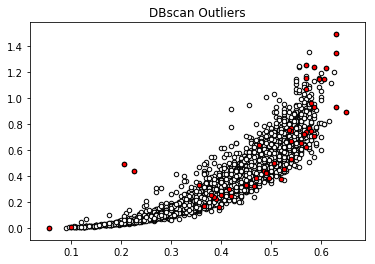

In [19]:
a = plt.scatter(X[:, 1], X[:, 4], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 1], y_outliers[:, 4], c='red', edgecolor='k', s=20)
plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan9.png",dpi=100)
plt.show()

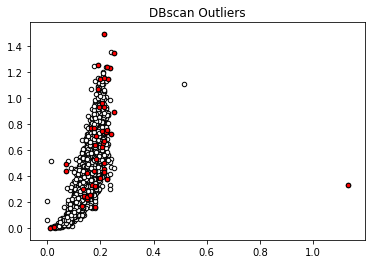

In [20]:
a = plt.scatter(X[:, 2], X[:, 4], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 2], y_outliers[:, 4], c='red', edgecolor='k', s=20)

plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan10.png",dpi=100)
plt.show()

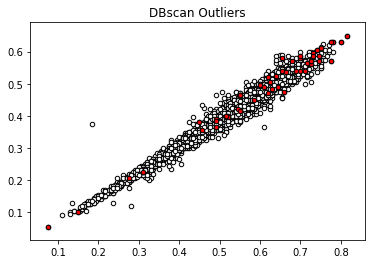

In [21]:
a = plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 0], y_outliers[:, 1], c='red', edgecolor='k', s=20)
plt.title('DBscan Outliers')
plt.draw()
plt.savefig("dbscan11.png",dpi=100)
plt.show()

## Local Outlier Factor

In [22]:
%matplotlib inline

## Anomaly detection with Local Outlier Factor (LOF)

This example presents the Local Outlier Factor (LOF) estimator. The LOF
algorithm is an unsupervised outlier detection method which computes the local
density deviation of a given data point with respect to its neighbors.
It considers as outlier samples that have a substantially lower density than
their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically
chosen 1) greater than the minimum number of objects a cluster has to contain,
so that other objects can be local outliers relative to this cluster, and 2)
smaller than the maximum number of close by objects that can potentially be
local outliers.
In practice, such informations are generally not available, and taking
n_neighbors=20 appears to work well in general.


In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

abalone_data = pd.read_csv("abalone_dataset.csv")
abalone_data = abalone_data.drop('sex', axis = 1)

X = abalone_data.values

# fit the model
clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.01)
y_pred = clf.fit_predict(X)

Automatically created module for IPython interactive environment


In [24]:
X

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [25]:
len(y_pred)

4177

In [26]:
abalone_data['outliers'] = y_pred

In [27]:
len(abalone_data[abalone_data['outliers'] == -1])

42

In [28]:
abalone_data[abalone_data['outliers'] == -1]

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,outliers
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-1
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,-1
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,-1
306,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3,-1
480,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,29,-1
520,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3,-1
526,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3,-1
719,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,-1
720,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3,-1
860,0.595,0.475,0.160,1.1405,0.5470,0.2310,0.2710,6,-1


In [29]:
outliers_lof = abalone_data[abalone_data['outliers'] == -1]

In [30]:
outliers_lof.to_csv('outliers_lof.csv')

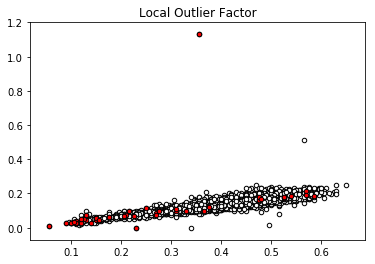

In [31]:
y_outliers = X[y_pred==-1]
a = plt.scatter(X[:, 1], X[:, 2], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:,1], y_outliers[:, 2], c='red', edgecolor='k', s=20)

plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof1.png",dpi=100)
plt.show()

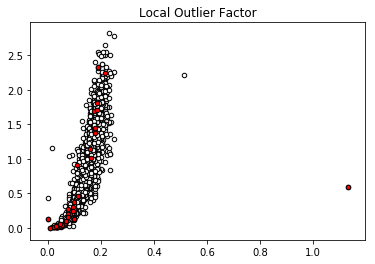

In [32]:
a = plt.scatter(X[:, 2], X[:, 3], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 2], y_outliers[:, 3], c='red', edgecolor='k', s=20)

plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof2.png",dpi=100)
plt.show()

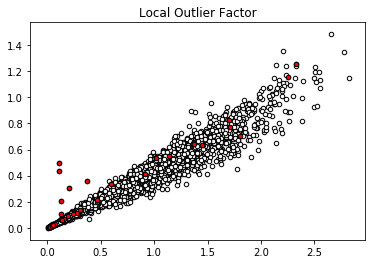

In [33]:
a = plt.scatter(X[:, 3], X[:, 4], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 3], y_outliers[:, 4], c='red', edgecolor='k', s=20)

plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof3.png",dpi=100)
plt.show()

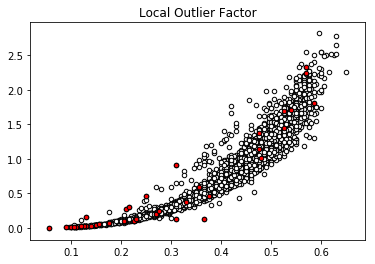

In [34]:
a = plt.scatter(X[:, 1], X[:, 3], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 1], y_outliers[:, 3], c='red', edgecolor='k', s=20)

plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof4.png",dpi=100)
plt.show()

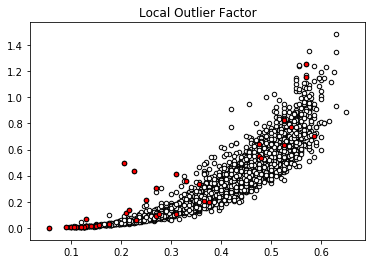

In [35]:
a = plt.scatter(X[:, 1], X[:, 4], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 1], y_outliers[:, 4], c='red', edgecolor='k', s=20)
plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof5.png",dpi=100)
plt.show()

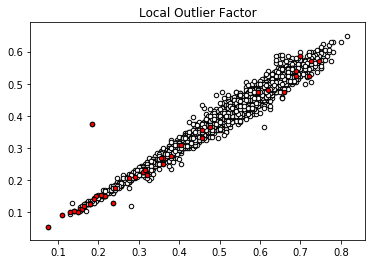

In [36]:
a = plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='k', s=20)
b = plt.scatter(y_outliers[:, 0], y_outliers[:, 1], c='red', edgecolor='k', s=20)

plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof6.png",dpi=100)
plt.show()

In [37]:
len(y_outliers)

42

In [38]:
y_outliers

array([[7.5000e-02, 5.5000e-02, 1.0000e-02, 2.0000e-03, 1.0000e-03,
        5.0000e-04, 1.5000e-03, 1.0000e+00],
       [1.3000e-01, 1.0000e-01, 3.0000e-02, 1.3000e-02, 4.5000e-03,
        3.0000e-03, 4.0000e-03, 3.0000e+00],
       [1.1000e-01, 9.0000e-02, 3.0000e-02, 8.0000e-03, 2.5000e-03,
        2.0000e-03, 3.0000e-03, 3.0000e+00],
       [1.6500e-01, 1.2000e-01, 3.0000e-02, 2.1500e-02, 7.0000e-03,
        5.0000e-03, 5.0000e-03, 3.0000e+00],
       [7.0000e-01, 5.8500e-01, 1.8500e-01, 1.8075e+00, 7.0550e-01,
        3.2150e-01, 4.7500e-01, 2.9000e+01],
       [2.1000e-01, 1.5000e-01, 5.0000e-02, 3.8500e-02, 1.5500e-02,
        8.5000e-03, 1.0000e-02, 3.0000e+00],
       [1.5500e-01, 1.1000e-01, 4.0000e-02, 1.5500e-02, 6.5000e-03,
        3.0000e-03, 5.0000e-03, 3.0000e+00],
       [1.5000e-01, 1.0000e-01, 2.5000e-02, 1.5000e-02, 4.5000e-03,
        4.0000e-03, 5.0000e-03, 2.0000e+00],
       [1.6000e-01, 1.1000e-01, 2.5000e-02, 1.8000e-02, 6.5000e-03,
        5.5000e-03, 5.0000e-

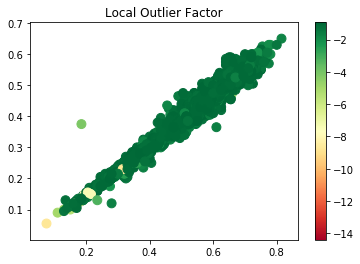

In [39]:
plt.scatter(X[:, 0], X[:, 1], s=80, c=clf.negative_outlier_factor_, cmap='RdYlGn')
plt.colorbar()
plt.title('Local Outlier Factor')
plt.draw()
plt.savefig("lof7.png",dpi=100)
plt.show()

# Depth based outlier detection - Convex Hull

### Data loading and preparation

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
abalone_data = pd.read_csv("abalone_dataset.csv")

In [3]:
abalone_data_mf = abalone_data[abalone_data.sex != 'I']

In [4]:
abalone_data_mf = abalone_data.drop('sex',axis = 1)

In [5]:
abalone_data_mf.head()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
def depth_outliers(points):
    depth = list()
    dataset = points
    while len(dataset) > 0:
        if len(dataset) > 2:
            hull = ConvexHull(dataset)
            hv = hull.vertices
        else:
            hv = range(len(dataset))
        depth.append(dataset[hv])
        dataset = array([ dataset[i] for i in range(len(dataset)) if i not in hv])
    return depth

Layers:  9


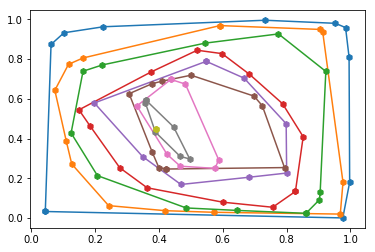

In [7]:
points = np.random.rand(80, 2)
depth_set = depth_outliers(points)

print "Layers: ", len(depth_set)

for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,0], dd2[:,1], 'h-')

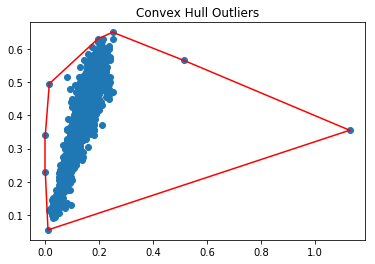

In [8]:
points = abalone_data[["height", "diameter"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex1.png",dpi=100)
plt.show()

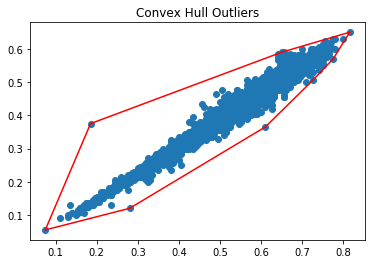

In [9]:
points = abalone_data[["length", "diameter"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex2.png",dpi=100)
plt.show()

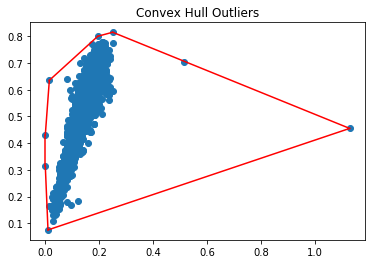

In [10]:
points = abalone_data[["height", "length"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex3.png",dpi=100)
plt.show()

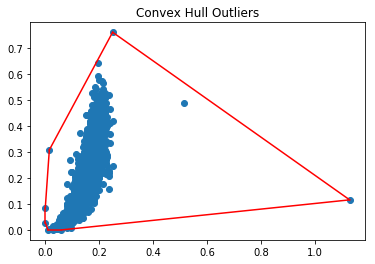

In [11]:
points = abalone_data[["height", "weight_viscera"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex4.png",dpi=100)
plt.show()

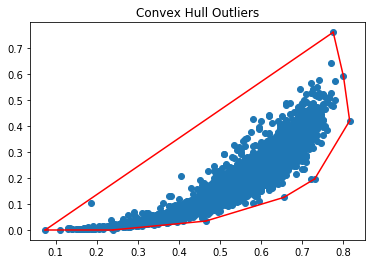

In [12]:
points = abalone_data[["length", "weight_viscera"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex5.png",dpi=100)
plt.show()

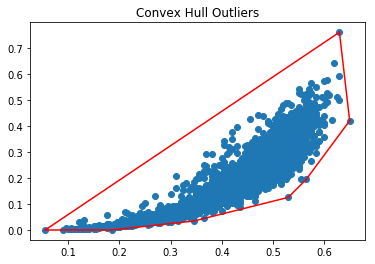

In [13]:
points = abalone_data[["diameter", "weight_viscera"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex6.png",dpi=100)
plt.show()

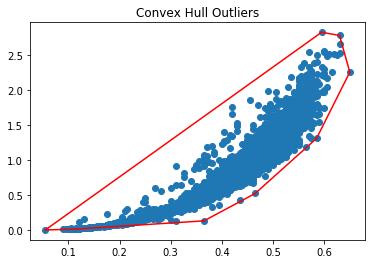

In [14]:
points = abalone_data[["diameter", "weight_whole"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex7.png",dpi=100)
plt.show()

In [15]:
import time

In [17]:
%%time

points = abalone_data_mf.values
depth_set = depth_outliers(points)

print "Layers: ", len(depth_set)

Layers:  6
Wall time: 3min 59s


In [18]:
depth_set[1]

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.53  ,  0.415 ,  0.15  , ...,  0.1415,  0.33  , 20.    ],
       [ 0.545 ,  0.425 ,  0.125 , ...,  0.1495,  0.26  , 16.    ],
       ...,
       [ 0.44  ,  0.35  ,  0.11  , ...,  0.0895,  0.115 ,  6.    ],
       [ 0.39  ,  0.31  ,  0.085 , ...,  0.0695,  0.079 ,  7.    ],
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ]])

In [19]:
print len(depth_set[0])
print len(depth_set[1])
print len(depth_set[2])
print len(depth_set[3])
print len(depth_set[4])
print len(depth_set[5])

504
1292
1415
748
209
9


In [20]:
sduz = ConvexHull(points)

In [21]:
len(sduz.vertices)

504

In [22]:
sduz.vertices

array([  10,   14,   16,   31,   32,   43,   46,   81,   85,  109,  113,
        125,  128,  129,  149,  159,  163,  164,  165,  166,  168,  169,
        170,  174,  176,  177,  178,  181,  186,  192,  215,  224,  236,
        238,  239,  246,  270,  274,  288,  294,  297,  305,  306,  307,
        308,  310,  312,  313,  314,  318,  323,  332,  334,  351,  355,
        358,  365,  372,  373,  374,  379,  407,  417,  418,  419,  423,
        427,  428,  433,  434,  437,  443,  445,  446,  452,  454,  464,
        465,  478,  480,  481,  495,  496,  501,  510,  514,  517,  518,
        520,  523,  524,  525,  526,  542,  546,  547,  565,  567,  608,
        609,  611,  613,  619,  623,  634,  635,  645,  646,  647,  664,
        665,  673,  674,  675,  678,  679,  687,  694,  695,  696,  699,
        709,  719,  720,  725,  729,  746,  747,  749,  750,  752,  753,
        756,  759,  760,  762,  770,  773,  775,  788,  789,  790,  801,
        811,  818,  822,  831,  860,  882,  885,  8

In [23]:
import pickle

with open("depth_out.txt", "wb") as fp:   #Pickling
    pickle.dump(sduz.vertices, fp)

with open("depth_out.txt", "rb") as fp:   # Unpickling
    vertici = pickle.load(fp)

In [24]:
len(vertici)

504

In [25]:
depth_set[0]

array([[ 0.525 ,  0.38  ,  0.14  , ...,  0.1475,  0.21  , 14.    ],
       [ 0.47  ,  0.355 ,  0.1   , ...,  0.0805,  0.185 , 10.    ],
       [ 0.355 ,  0.28  ,  0.085 , ...,  0.0395,  0.115 ,  7.    ],
       ...,
       [ 0.67  ,  0.525 ,  0.2   , ...,  0.297 ,  0.657 , 11.    ],
       [ 0.77  ,  0.605 ,  0.175 , ...,  0.526 ,  0.355 , 11.    ],
       [ 0.35  ,  0.25  ,  0.075 , ...,  0.0355,  0.041 ,  6.    ]])

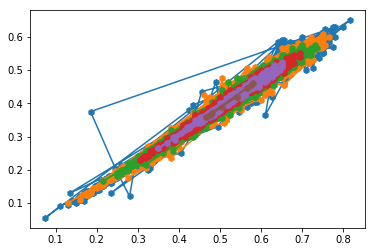

In [26]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,0], dd2[:,1], 'h-')
    

plt.draw()
plt.savefig("convex8.png",dpi=100)
plt.show()

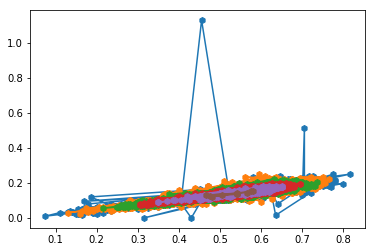

In [27]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,0], dd2[:,2], 'h-')

plt.draw()
plt.savefig("convex9.png",dpi=100)
plt.show()

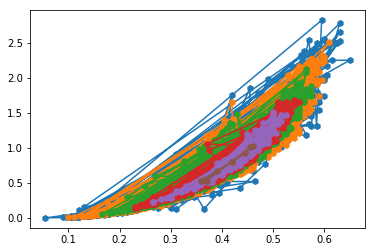

In [28]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,1], dd2[:,3], 'h-')

plt.draw()
plt.savefig("convex10.png",dpi=100)
plt.show()

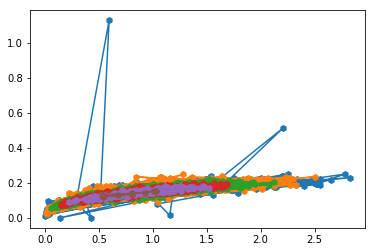

In [29]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,3], dd2[:,2], 'h-')
plt.draw()
plt.savefig("convex11.png",dpi=100)
plt.show()

# Comparison

In [54]:
outliers_lof = pd.read_csv('outliers_lof.csv', index_col = 0)

In [55]:
outliers_lof

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,outliers
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-1
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,-1
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,-1
306,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3,-1
480,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,29,-1
520,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3,-1
526,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3,-1
719,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,-1
720,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3,-1
860,0.595,0.475,0.160,1.1405,0.5470,0.2310,0.2710,6,-1


In [56]:
outliers_dbscan = pd.read_csv('outliers_dbscan.csv', index_col = 0)

In [57]:
outliers_dbscan

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,dbscan_label
129,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18,-1
163,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.0050,18,-1
165,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14,-1
166,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.8500,20,-1
167,0.680,0.570,0.205,1.8420,0.6250,0.4080,0.6500,20,-1
232,0.625,0.505,0.215,1.4455,0.4960,0.2870,0.4350,22,-1
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-1
270,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.5500,22,-1
275,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.5850,22,-1
294,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26,-1


In [58]:
lof_indexes = outliers_lof.index.tolist()

In [59]:
dbscan_indexes = outliers_dbscan.index.tolist()

In [60]:
len(lof_indexes), len(dbscan_indexes)

(42, 49)

In [61]:
for i in set(lof_indexes).intersection(set(dbscan_indexes)):
    print i

1216
480
2051
2811
236
719
1426
2627
1039


In [62]:
lof_indexes

[236L,
 237L,
 238L,
 306L,
 480L,
 520L,
 526L,
 719L,
 720L,
 860L,
 894L,
 1039L,
 1044L,
 1054L,
 1210L,
 1216L,
 1228L,
 1264L,
 1426L,
 1429L,
 1755L,
 2051L,
 2115L,
 2123L,
 2127L,
 2371L,
 2619L,
 2627L,
 2641L,
 2711L,
 2728L,
 2790L,
 2811L,
 2975L,
 3086L,
 3472L,
 3521L,
 3716L,
 3718L,
 3801L,
 3814L,
 3996L]

In [63]:
dbscan_indexes

[129L,
 163L,
 165L,
 166L,
 167L,
 232L,
 236L,
 270L,
 275L,
 294L,
 313L,
 314L,
 351L,
 355L,
 358L,
 433L,
 480L,
 501L,
 673L,
 674L,
 675L,
 678L,
 719L,
 811L,
 882L,
 891L,
 1039L,
 1209L,
 1216L,
 1426L,
 1427L,
 1428L,
 1763L,
 2051L,
 2090L,
 2108L,
 2161L,
 2201L,
 2209L,
 2305L,
 2334L,
 2335L,
 2436L,
 2627L,
 2811L,
 3007L,
 3149L,
 3280L,
 3427L]

In [64]:
import pickle
with open("depth_out.txt", "rb") as fp:   # Unpickling
    depth_indexes = pickle.load(fp)

In [65]:
len(depth_indexes)

504

In [66]:
len(set(depth_indexes).intersection(set(dbscan_indexes)))

44

In [67]:
len(set(depth_indexes).intersection(set(lof_indexes)))

36

In [68]:
set(set(lof_indexes).intersection(set(dbscan_indexes))).intersection(set(dbscan_indexes))

{236L, 480L, 719L, 1039L, 1216L, 1426L, 2051L, 2627L, 2811L}